In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sodapy import Socrata

In [2]:
#api info at https://dev.socrata.com/foundry/data.cdc.gov/9mfq-cb36
#table info https://data.cdc.gov/Case-Surveillance/United-States-COVID-19-Cases-and-Deaths-by-State-o/9mfq-cb36

client = Socrata("data.cdc.gov",None)

In [3]:
results = client.get("9mfq-cb36", limit=100000)

In [4]:
covid_df = pd.DataFrame(results)

In [5]:
#Set date and cutoff the date at january 1st 2022
covid_df["submission_date"] = pd.to_datetime(covid_df["submission_date"])
covid_df = covid_df.sort_values(by=["submission_date"])
cutoff_date = pd.to_datetime('2022-01-01')
covid_df = covid_df[covid_df["submission_date"] <= cutoff_date]

In [6]:
#Update columns that we can use to intigers and correct date
covid_df["submission_date"]=pd.to_datetime(covid_df["submission_date"])
covid_df["tot_cases"]= covid_df['tot_cases'].apply(lambda x:int(float(x)))
covid_df["conf_cases"].fillna(0, inplace=True)
covid_df["conf_cases"]= covid_df['conf_cases'].apply(lambda x:int(float(x)))
covid_df["prob_cases"].fillna(0, inplace=True)
covid_df["prob_cases"]= covid_df['prob_cases'].apply(lambda x:int(float(x)))
covid_df["new_case"]= covid_df['new_case'].apply(lambda x:int(float(x)))
covid_df["pnew_case"].fillna(0, inplace=True)
covid_df["pnew_case"]= covid_df['pnew_case'].apply(lambda x:int(float(x)))
covid_df["new_death"]= covid_df['new_death'].apply(lambda x:int(float(x)))
covid_df["tot_death"]= covid_df["tot_death"].apply(lambda x:int(float(x)))
covid_df["pnew_death"].fillna(0, inplace=True)
covid_df["pnew_death"]= covid_df['pnew_case'].apply(lambda x:int(float(x)))

cutoff_date = pd.to_datetime('2022-01-01')
covid_df = covid_df[covid_df["submission_date"] <= cutoff_date]


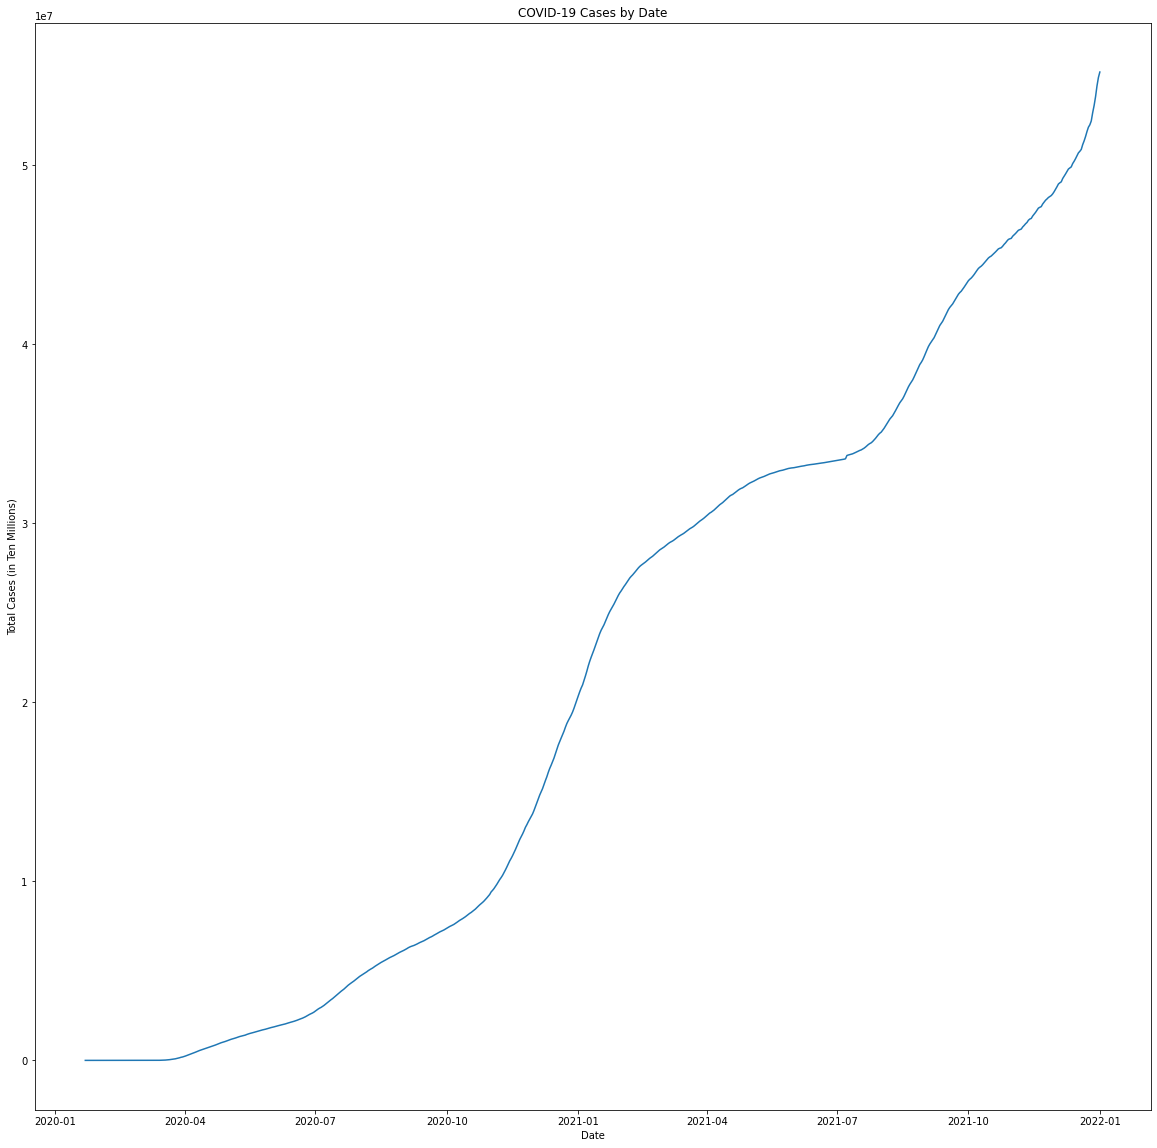

In [7]:
covid_df['submission_date'] = pd.to_datetime(covid_df['submission_date'])
total_states_cases= covid_df.groupby("submission_date").sum()["tot_cases"]
total_states_cases = pd.DataFrame({'date': total_states_cases.index, 'total_cases': total_states_cases.values})

fig, ax = plt.subplots(figsize=(20, 20))
plt.plot(total_states_cases['date'], total_states_cases['total_cases'])
ax.set_xlabel('Date')
ax.set_ylabel('Total Cases (in Ten Millions)')
ax.set_title('COVID-19 Cases by Date')

fig.savefig('covid_cases.png')

In [33]:
covid_by_month_df = covid_df
covid_by_month_df['submission_date']=pd.to_datetime(covid_by_month_df['submission_date'])
covid_by_month_df['Year_Month']= covid_by_month_df['submission_date'].dt.strftime('%Y-%m')
covid_by_month= covid_by_month_df.groupby('Year_Month')['new_case'].sum().reset_index



<bound method Series.reset_index of Year_Month
2020-01          9
2020-02         73
2020-03     212056
2020-04     877228
2020-05     743214
2020-06     862148
2020-07    1939039
2020-08    1476290
2020-09    1219711
2020-10    1934324
2020-11    4431503
2020-12    6367438
2021-01    6086927
2021-02    2343640
2021-03    1793992
2021-04    1845380
2021-05     899232
2021-06     392694
2021-07    1380329
2021-08    4255181
2021-09    4111170
2021-10    2443296
2021-11    2563756
2021-12    6376779
2022-01     303447
Name: new_case, dtype: int64>